### Install required libraries, data and code

In [5]:
# Install required libs
!pip install segmentation-models-pytorch

     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 376 kB 49.9 MB/s 
     |████████████████████████████████| 58 kB 3.9 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=cdc969a59da64ed67a95bfea1fc83052947a3eeb7e339721941f6d97ff205150
  Stored in directory: /root/.cache/pip/wheels/90/6b/0c/f0ad36d00310e65390b0d4c9218ae6250ac579c92540c9097a
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=9f7667c2f741e2fd1bfa1d7311bb991988338477438201747bf8c003dd91e17d
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels


In [2]:
# download dataset
!gdown --id 1badu11NqxGf6qM3PTTooQDJvQbejgbTv
!unzip ./CelebAMask-HQ.zip > /dev/null

Downloading...
From: https://drive.google.com/uc?id=1badu11NqxGf6qM3PTTooQDJvQbejgbTv
To: /content/CelebAMask-HQ.zip
100% 3.15G/3.15G [00:48<00:00, 64.6MB/s]


In [3]:
# download train/test split information
!wget -O split_info.csv https://edu.tinkoff.ru/files/10e5aa2b-26ae-4110-b7a6-2beed2c7da6a

--2022-01-08 17:30:46--  https://edu.tinkoff.ru/files/10e5aa2b-26ae-4110-b7a6-2beed2c7da6a
Resolving edu.tinkoff.ru (edu.tinkoff.ru)... 178.248.239.60
Connecting to edu.tinkoff.ru (edu.tinkoff.ru)|178.248.239.60|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /media/edu-files-ext-101/train_test_split-10e5aa2b-26ae-4110-b7a6-2beed2c7da6a.csv [following]
--2022-01-08 17:30:47--  https://edu.tinkoff.ru/media/edu-files-ext-101/train_test_split-10e5aa2b-26ae-4110-b7a6-2beed2c7da6a.csv
Reusing existing connection to edu.tinkoff.ru:443.
HTTP request sent, awaiting response... 200 OK
Length: 74443 (73K) [binary/octet-stream]
Saving to: ‘split_info.csv’

split_info.csv      100%[===================>]  72.70K  --.-KB/s    in 0.1s    

2022-01-08 17:30:47 (660 KB/s) - ‘split_info.csv’ saved [74443/74443]



In [4]:
# download required files from repo
import os

if not os.path.exists('./train.py'):
    print("train file not found locally. Downloading from github.")
    !wget https://raw.githubusercontent.com/zilante/face_attr_segmentation/main/train.py -nc

if not os.path.exists('./dataloader.py'):
    print("dataloader file not found locally. Downloading from github.")
    !wget https://raw.githubusercontent.com/zilante/face_attr_segmentation/main/dataloader.py -nc

if not os.path.exists('./test.py'):
    print("test file not found locally. Downloading from github.")
    !wget https://raw.githubusercontent.com/zilante/face_attr_segmentation/main/test.py -nc


from pathlib import Path
Path('./constants').mkdir(exist_ok=True)

if not os.path.exists('./constants/data.py'):
    print("constants/data file not found locally. Downloading from github.")
    %cd ./constants
    !wget https://raw.githubusercontent.com/zilante/face_attr_segmentation/main/constants/data.py -nc
    %cd ..

if not os.path.exists('./constants/model.py'):
    print("constants/model file not found locally. Downloading from github.")
    %cd ./constants
    !wget https://raw.githubusercontent.com/zilante/face_attr_segmentation/main/constants/model.py -nc
    %cd ..

train file not found locally. Downloading from github.
--2022-01-08 17:30:51--  https://raw.githubusercontent.com/zilante/face_attr_segmentation/main/train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4205 (4.1K) [text/plain]
Saving to: ‘train.py’

train.py            100%[===================>]   4.11K  --.-KB/s    in 0s      

2022-01-08 17:30:51 (28.8 MB/s) - ‘train.py’ saved [4205/4205]

dataloader file not found locally. Downloading from github.
--2022-01-08 17:30:51--  https://raw.githubusercontent.com/zilante/face_attr_segmentation/main/dataloader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

### Train and test the model

In [7]:
# train the model
!chmod +x train.py
!python3 train.py -d cuda -v . ./split_info.csv

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100% 13.6M/13.6M [00:00<00:00, 34.8MB/s]

Epoch: 0
train: 100% 225/225 [10:05<00:00,  2.69s/it, dice_loss - 0.5462, skin dice score - 0.8245, nose dice score - 0.7132, eye_g dice score - 0.00824, l_eye dice score - 0.3711, r_eye dice score - 0.0031, l_brow dice score - 0.4529, r_brow dice score - 0.5257, l_ear dice score - 0.5655, r_ear dice score - 0.5377, mouth dice score - 0.0334, u_lip dice score - 0.5214, l_lip dice score - 0.3253, hair dice score - 0.7212, hat dice score - 0.01439, ear_r dice score - 0.003388, neck_l dice score - 0.0008363, neck dice score - 0.6093, cloth dice score - 0.5785, fscore - 0.1657]
valid: 100% 25/25 [00:44<00:00,  1.80s/it, dice_loss - 0.3511, skin dice score - 0.8723, nose dice score - 0.8325, eye_g dice score - 0.04193, l_eye dice score - 0.7691, r_eye dice score - 0.002966, l_brow dice score - 0.7503, r_brow di

In [8]:
# test the model
!chmod +x test.py
!python3 test.py -d cuda -v ./visualization ./best_model.pth . ./split_info.csv

valid: 100% 125/125 [02:21<00:00,  1.14s/it, log_dice_loss - 0.2545, skin_dice_score - 0.924, nose_dice_score - 0.8833, eye_g_dice_score - 0.7565, l_eye_dice_score - 0.8385, r_eye_dice_score - 0.8347, l_brow_dice_score - 0.7943, r_brow_dice_score - 0.7829, l_ear_dice_score - 0.7773, r_ear_dice_score - 0.7754, mouth_dice_score - 0.8479, u_lip_dice_score - 0.8266, l_lip_dice_score - 0.846, hair_dice_score - 0.8921, hat_dice_score - 0.5036, ear_r_dice_score - 0.5402, neck_l_dice_score - 0.1513, neck_dice_score - 0.8275, cloth_dice_score - 0.7437]


### Visualization

In [24]:
import matplotlib.pyplot as plt
import torch

# helper function for data visualization
def visualize(**images):
    """PLot images."""
    n = len(images)
    plt.figure(figsize=(15, 10))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot((n - 1) // 4 + 1, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(torch.movedim(image, 0, 2))
    plt.show()

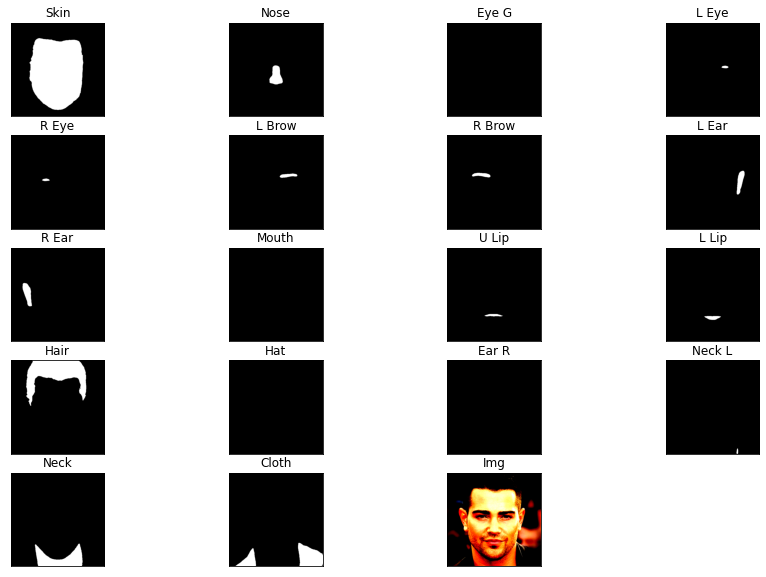

In [25]:
import os
from torchvision.io import read_image
import constants.data as constants

visualization_dir = './visualization'
img = read_image(os.path.join(visualization_dir, 'img.png'))

masks = {
    class_name: read_image(
          os.path.join(visualization_dir, class_name + '.png')
    ) for class_name in constants.CLASSES
}

imgs = masks
imgs['img'] = img

visualize(**imgs)